<a href="https://colab.research.google.com/github/AkarshAnilkumar/AML-331-Python-and-Machine-Learning-Lab/blob/main/naive_Bayes_Gov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Content_works/emaildataset.csv")

features = ['free','win','Offer']
class1 = ['notspam','spam']
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
def isspam(string):  #Congrats you have won an iphone, for free click here.
  win=0
  free=0
  offer=0
  sales=0
  txt=list(string.split())
  for i in txt:
    if i.lower()== 'win' or i.lower()== 'won':
      win+=1
    elif i.lower()== 'free':
      free+=1
    elif i.lower()== 'offer':
      offer+=1
    elif i.lower()== 'sales':
      sales+=1
  sum1 = win+free+offer+sales
  if sum1 >= 2 :
    return True
  else:
    return False

In [ ]:
def probability(column):
  class2 = column
  n = len(class2)
  count = 0
  for i in class2:
    if i == "spam":
      count += 1
  hamcount = n - count
  return [count/n,hamcount/n]

In [ ]:
# text = input("Enter your mail content: ")
# if isspam(text):
#   print("Spam text identified")
# else:
#   print("Text is not spam")
list1 = [] #[spam,ham,spam]
mail = dataset["v2"]
for i in mail:
  if isspam(i):
    list1.append("spam")
  else:
    list1.append("ham")
# print(list1)
dataset.insert(2,"pred",list1,True)
print("Actual Probability: ",probability(dataset["v1"]))
print("Predicted Probability: ",probability(dataset["pred"]))

Actual Probability:  [0.13406317300789664, 0.8659368269921034]
Predicted Probability:  [0.008973438621679828, 0.9910265613783201]


In [36]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

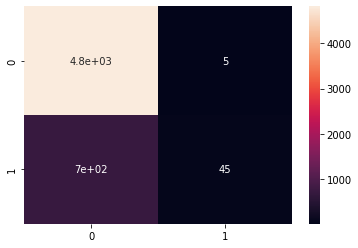

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
"""y_predict = NB_classifier.predict(dataset)
y_predict
"""
y_true = dataset["v1"]
y_pred = dataset["pred"]
confusion_matrix(y_true, y_pred, labels=["ham", "spam"])
cm = confusion_matrix(dataset["v1"],dataset["pred"])
sns.heatmap(cm,annot=True)